In [1]:
!unzip mnist.zip

Archive:  mnist.zip
  inflating: mnist_train.csv         


  inflating: mnist_test.csv          


In [2]:
!pip install -q numpy matplotlib pandas

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
     # Inicjalizator, ustawiający atrybut self.w oraz self.b jako wektor losowych wag, n ilość sygnałów wejściowych (bias)
    def __init__(self, n, bias=True):
        self.w = np.random.rand(n)
        self.b = 1.0 if bias else 0.0

    # Metoda obliczająca odpowiedz modelu dla zadanego sygnału wejściowego x=[x1,x2,...,xN]
    def predict(self, x):
        activation = np.dot(self.w, x) + self.b
        return 1 if activation >= 0 else 0

    # Metoda uczenia według reguły perceptronu, xx - zbiór danych uczących, d - odpowiedzi,
    # eta - współczynnik uczenia,
    # tol - tolerancja (czyli jak duży błąd jesteśmy w stanie zaakceptować)
    def train(self, xx, d, eta, tol) -> list:
        errors_for_epoch = []
        t = 0
        while True:
            errors = 0
            for x, desired in zip(xx, d):
                prediction = self.predict(x)


                if prediction != desired:
                    error = desired - prediction

                    if prediction == 0 and desired == 1:
                        self.w += eta * np.array(x)
                        self.b += eta
                    elif prediction == 1 and desired == 0:
                        self.w -= eta * np.array(x)
                        self.b -= eta

                    errors += 1
            if errors <= tol:
                break

            t += 1
            errors_for_epoch.append(errors)
        plt.plot(errors_for_epoch)
        plt.show()
        print(f"Algorytm zatrzymał się po {t} epokach")


    # Metoda obliczająca błąd dla danych testowych xx
    # zwraca błąd oraz wektor odpowiedzi perceptronu dla danych testowych
    def evaluate_test(self, xx, d):
        errors = 0
        predictions = []
        for x, desired in zip(xx, d):
            prediction = self.predict(x)
            predictions.append(prediction)
            errors += abs(desired - prediction)
        return errors, predictions



In [4]:
import pandas as pd
import numpy as np
test = pd.read_csv('mnist_test.csv', delimiter=',')
train = pd.read_csv('mnist_train.csv', delimiter=',')

#test.head(3)

y_train = train.iloc[:, 0].values
X_train = train.iloc[:, 1:].values

y_test = test.iloc[:, 0].values
X_test = test.iloc[:, 1:].values




In [5]:
# pick only 0 i 3
train_03_idx = ((y_train == 3) | (y_train == 0))
X_train_03 = X_train[train_03_idx]
y_train_03 = y_train[train_03_idx]

test_03_idx = ((y_test == 3) | (y_test == 0))
X_test_03 = X_test[test_03_idx]
y_test_03 = y_test[test_03_idx]

# normalize data
# change labels 0->0, 3->1
y_train_03 = np.where(y_train_03 == 3, 1, 0)
y_test_03 = np.where(y_test_03 == 3, 1, 0)

# normalize color
colour_depth = 255
X_train = X_train / colour_depth
X_test = X_test / colour_depth



In [6]:
p = Perceptron(n=X_train_03.shape[1])

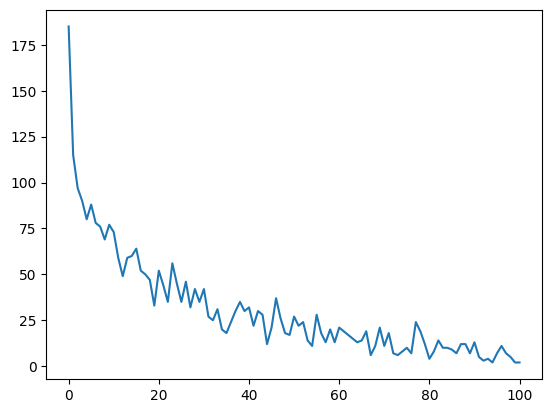

Algorytm zatrzymał się po 101 epokach


In [7]:
p.train(X_train_03, y_train_03, 0.01, 0)

In [8]:
errors, predictions = p.evaluate_test(X_test_03, y_test_03)

In [9]:
!pip3 install -q -U scikit-learn
!pip3 install -q seaborn

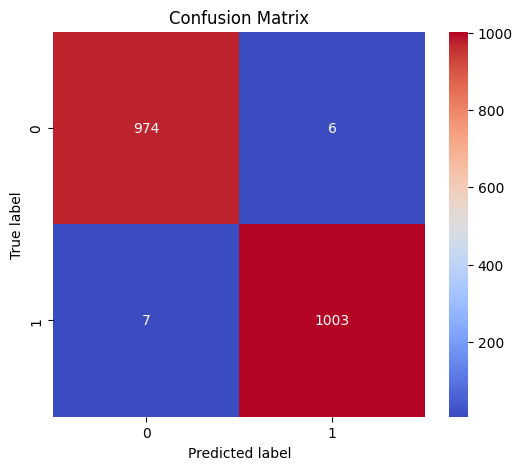

In [10]:
import sklearn.metrics as mt

conf_matrix = mt.confusion_matrix(y_test_03, predictions)
import seaborn as sns

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Confusion Matrix")
plt.show()


In [11]:
accuracy_score = mt.accuracy_score(y_test_03, predictions)
precision = mt.precision_score(y_test_03, predictions)
recall = mt.recall_score(y_test_03, predictions)
f1_score = mt.f1_score(y_test_03, predictions)

print(f"Accuracy: {accuracy_score:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1 Score: {f1_score:.6f}")

Accuracy: 0.993467
Precision: 0.994054
Recall: 0.993069
F1 Score: 0.993561


In [12]:
from PIL import Image

In [13]:
zero = np.array(Image.open('zero.jpg'))
three = np.array(Image.open('trzy.jpg'))

In [14]:
#walidacja
print(zero.min())
print(zero.max())
print(zero.shape)

print(three.min())
print(three.max())
print(three.shape)

7
255
(28, 28)
0
255
(28, 28, 3)


In [15]:
three = three[:, :, 1].ravel()
zero = zero.ravel()

In [16]:
if p.predict(three) == 1:
    print("udało się rozczytać 3!")
else:
    print("Nie udało się rozczytać 3 :(")

if p.predict(zero) == 0:
    print("udało się rozczytać 0!")
else:
    print("Nie udało się rozczytać 0 :(")

udało się rozczytać 3!
udało się rozczytać 0!
